In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   992 non-null    object 
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [5]:
df=df.drop(df[df['math score']=='?'].index)
df=df.drop(df[df['math score']<'0'].index)

In [6]:
df['math score']=df['math score'].ffill()

In [7]:
df['reading score']=df['reading score'].fillna(df['reading score'].mean())
df['writing score']=df['writing score'].fillna(df['writing score'].mean())

In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
df['math score']=df['math score'].astype('int64')

<Axes: >

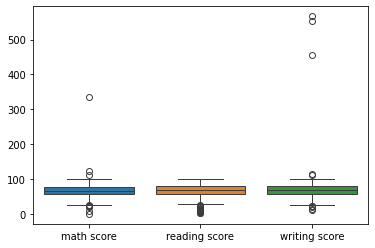

In [10]:
sns.boxplot(data=df)

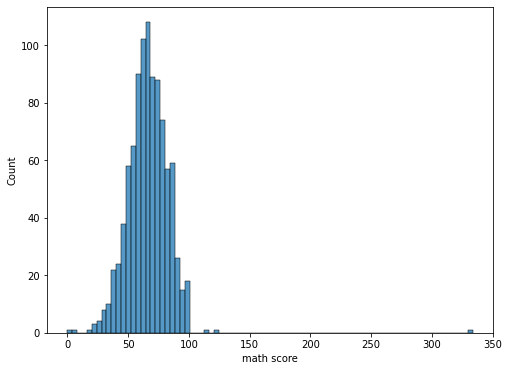

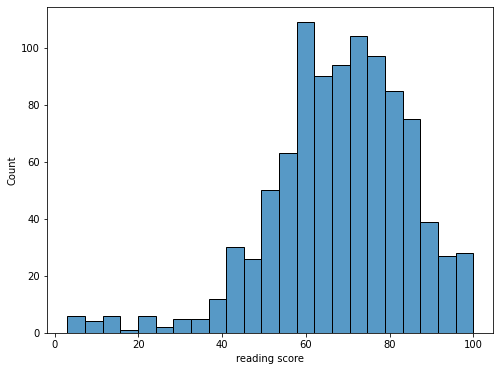

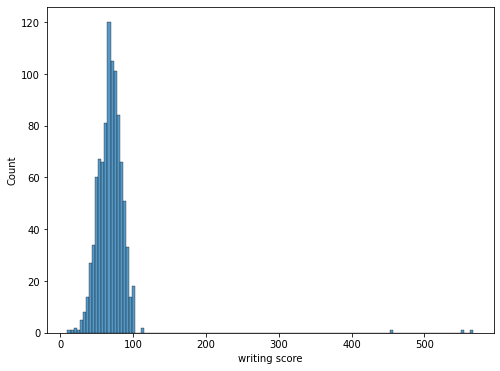

In [11]:
for i in df.select_dtypes(include=['int','float']).columns:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df[i])
    plt.show()

In [12]:
def remove(col):
    global df
    q1,q3=np.percentile(df[col],[25,75])
    iqr=q3-q1
    lw=q1-(1.5*iqr)
    uw=q3+(1.5*iqr)
    df[col]=np.where(df[col]<lw,lw,df[col])
    df[col]=np.where(df[col]>uw,uw,df[col])
    return df

In [13]:
remove('math score')
remove('reading score')
remove('writing score')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


<Axes: >

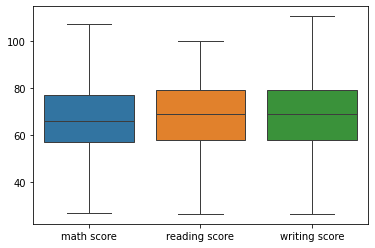

In [14]:
sns.boxplot(data=df)

In [15]:
df.skew(numeric_only=True)

math score      -0.117118
reading score   -0.425084
writing score   -0.147359
dtype: float64

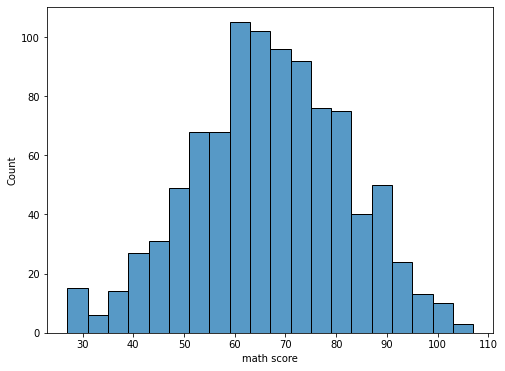

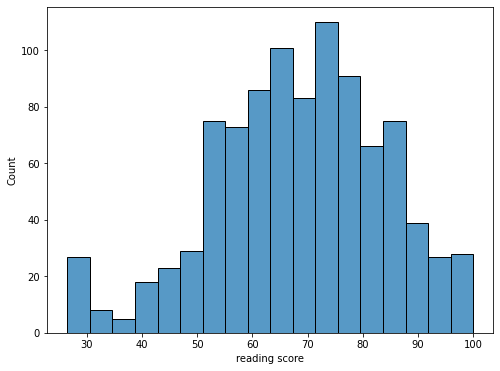

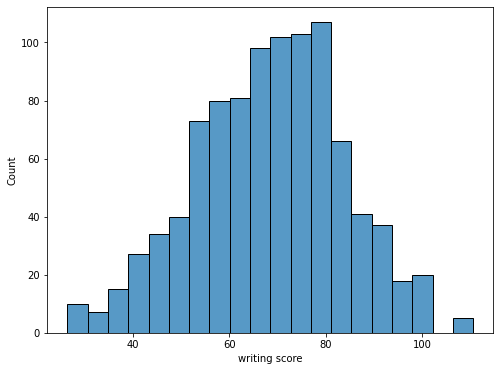

In [16]:
for i in df.select_dtypes(include=['int','float']).columns:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df[i])
    plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_df = df.copy()
col_names = ['math score','reading score','writing score']
features = new_df[col_names]

In [ ]:
new_df[col_names] = scaler.fit_transform(features.values)
new_df[col_names].describe()


new_df.head(10)

In [ ]:
sns.displot(data=new_df['math score'],kde=True)
sns.displot(data=new_df['reading score'],kde=True)
sns.displot(data=new_df['writing score'],kde=True)